# Module 1: Quantum Circuits and Backends


## Table of Contents

In these modules we will introduce how to use Qiskit. In particular, in this module we will first talk about how to build elementary quantum circuits and how to visualize the resulting states after applying the circuit. Secondly we will focus on executing these circuits on backends, trying also to scale our circuits to large number of qubits. Finally, we will look into other interesting Qiskit functionalities as the icing on the cake.


1. **Quantum Circuits**
- Quantum Gates: Creating Superposition and Entanglement
- Visualisation tools for States
- Unitaries

2. **Executing circuits on a quantum backend.** 
- Step 0: Create a quantum circuit and observables to measure.  
- Step 1: Optimize the circuit and gates.  
- Step 2: Execute using a quantum primitive function.  
- Step 3: Analyze the results.  

3. **Scale to large number of qubits (Optional)**
- Step 0: Map the problem
- Step 1: Optimize the problem for execution on quantum backend
- Step 3: Execute on Backend
- Step 4: Post-process results  

4. **Other interesting Qiskit functionalities (Optional)**
- Initialization of a state
- State and gate/process fidelity
- How to build generalized gates

## Before we begin

First of all, follow these instructions to [install and set up qiskit](https://docs.quantum.ibm.com/guides/install-qiskit). Only then you can run the modules of this course.

In these modules we will use the [Jupyter](https://jupyter.org/install) development environment, which is the most convenient way to interact with the IBM quantum computers.

If you’d like to learn more about how to use Qiskit and its various tools, start with the [Qiskit Documentation page](https://quantum.cloud.ibm.com/docs/en/guides) — it offers tutorial-style guides and examples. For a deeper dive into the technical details, you can explore the [Qiskit API Index](https://quantum.cloud.ibm.com/docs/en/api/qiskit) (though it can be quite overwhelming at first!)

In [1]:
import numpy as np
import qiskit
print("Qiskit version:", qiskit.__version__)  # Print Qiskit version

Qiskit version: 2.1.0


Make sure that the version you are using is 2.x! Now let's get started...

## 1. Quantum Circuits

In [106]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


In Qiskit (or in general, a quantum program) *quantum circuits* are the native format in which to represent quantum instructions. To [construct a circuit](https://quantum.cloud.ibm.com/docs/en/guides/construct-circuits), we have to define a new [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) object, which takes as input the number of qubits (quantum registers) and, optionally, number of bits (classical registers), of our circuit.

In defining this object, we can:
1. Directly give it an integer indicating the number of qubits present in the circuit, and optionally an intenger indicating the number of bits.

2. Explicitly specify quantum and classical registers.

Here is an example for 2 qubits:

In [107]:
#version 1
qc = QuantumCircuit(2, 2) # 2 qubits and 2 classical bits
qc.draw()

q_0: 
     
q_1: 
     
c: 2/

In [108]:
#version 2
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
qc.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

### Quantum Gates: Superposition and Entanglement

Let us now introduce the building blocks of quantum circuits, i.e. the quantum gates. These correspond to the unitary operations we can apply on one or more qubits. Let us introduce the ones we will need to create superposition and entanglement.

#### H Gate $\rightarrow$ Superposition

A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the $X$-axis and $Z$-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a *superposition* of states. This state is also written as $|+\rangle$.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

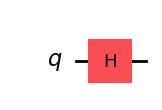

In [109]:
# Let's apply an H-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

>Note: When you are working in the Quantum Experience, the default mode of drawing a circuit, even when nothing is specified is, matplotlib. For those of you who might be working in local environments, to get these colorful nice looking circuits you would need to specify 'mpl' into the draw method. In fact we can also call it with 'text' and see what happens.

In [110]:
qc.draw('text')

┌───┐
q: ┤ H ├
   └───┘

To get information about our state we’ll use the qiskit `quantum_info` module from which we’ll import the `Statevector` object. This allows us to define initial states in many ways and evolve those states according to the given circuit. We can define initial states via different methods and we’ll demonstrate two of them here. One here in the superposition case and one in the entanglement case

In [111]:
from qiskit.quantum_info import Statevector

In [112]:
sv = Statevector.from_label('0') # 'n' <-> |n> 
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Now I can go with the evolve method to see the circuit outcome. When we do it in this straight-foward way, we see that we get something like an array. But we can also get a prettier print with specifying that we want to use ‘latex’

In [113]:
sv_ev = sv.evolve(qc)
sv_ev.draw()

'Statevector([0.70710678+0.j, 0.70710678+0.j],\n            dims=(2,))'

In [114]:
sv_ev.draw('latex')

<IPython.core.display.Latex object>

We've indeed created a superposition of $\ket{0}$ and $\ket{1}$, as expected.

**It’s important to note that here we’re not doing any experiments, ie. we’re not sampling from the circuit → we’re just doing exact math at the background to get an ideal state that'd be coming from a noiseless circuit and infinitely many shots**

We can also visualize this state in the Bloch sphere, by importing the `plot_bloch_multivector` function from the `qiskit.visualization` package

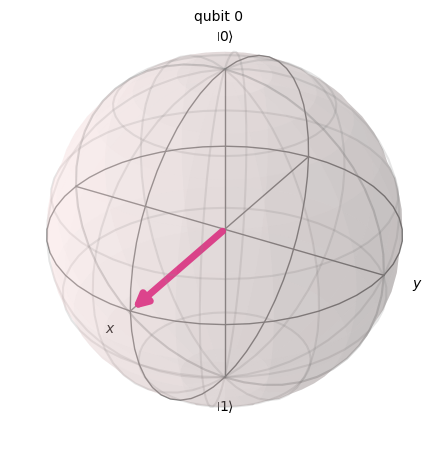

In [115]:
from qiskit.visualization import plot_bloch_multivector

sv = Statevector(qc)
plot_bloch_multivector(sv)

#### CX Gate (CNOT Gate) $\rightarrow$ Entanglement

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
\end{pmatrix}$

in the computational basis: $\{ \ket{00}, \ket{01}, \ket{10}, \ket{11} \}$

Why is the CNOT gate represented like this and not in the usual way you have probably seen in the Quantum Information course? To understand this we have to think about what the bit ordering convention in Qiskit is...

<div class="alert alert-info">


#### NOTE on bit ordering

In Qiskit, **qubit 0 is the least significant bit**, meaning it corresponds to the **rightmost bit** in the binary representation of a quantum state.
Qubits are indexed from right to left in the statevector (with higher indices being more significant), but they are **drawn from top to bottom** in circuit diagrams.

In other words:

* In **circuits**, qubits appear top to bottom as $q_0, \; q_1, \; ..., \; q_{n-1}$.
* In **statevectors** and measurement outcomes, bits are ordered right to left:  $|q_{n-1} q_{n-2} ... q_0⟩$.


So in the circuit below CNOT acts as:
$$
\ket{00} \rightarrow \ket{00} \\
\ket{01} \rightarrow \ket{11} \\
\ket{10} \rightarrow \ket{10} \\
\ket{11} \rightarrow \ket{01} \\
$$

This could be important when working with systems like spin chains, where the physical arrangement and indexing of qubits might affect the interpretation and results of quantum operations. 

For more details, see the [Bit-ordering in the Qiskit SDK](https://docs.quantum.ibm.com/guides/bit-ordering) topic.

</div>


>If you want to find out about all the other possible gates you can add to a quantum circuit, check out the [Qiskit Circuit Library](https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library). 

Now let’s create some entanglement. We can start by creating the first Bell state $\Phi^+$. Of course, to entangle two qubits we need them to interact, meaning, we need a 2-qubit gate in the gate-model. A CNOT conditioned on the superposed qubit will do the job. Let’s do it from scratch. But this time, let’s also add the 2nd argument to the QuantumCircuit to see what we get.

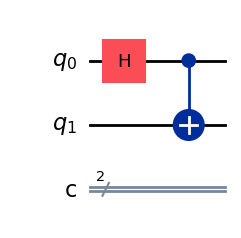

In [12]:
bell_1 = QuantumCircuit(2,2)
bell_1.h(0)
bell_1.cx(0,1)
bell_1.draw('mpl')

Printing this out, we now have a circuit with 2 qubits but also 2 classical registers. Thus, we see we don't have to explicitly define classical registers.

Let’s now read out the state from our circuit to check if we have created a Bell state. However, this time we’ll use a different method to define a Statevector object. We will use the `from_int` method. We simply tell it the computational state we want at the first argument, and for the second we give it the vector size, i.e. the dimension of the Hilbert space.


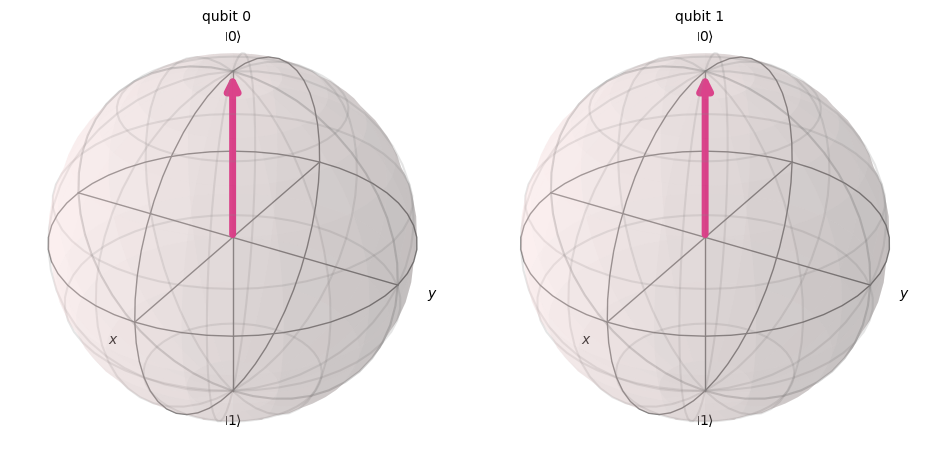

In [13]:
#Initial state |00>
sv = Statevector.from_int(0, 2**2)
plot_bloch_multivector(sv) # works well for product states only

**How is this plot_bloch_multivector representation actually being done?** Simply put, each of the (x,y,z) coordinates are coming from expectation values of the single qubit X, Y, Z Pauli operators. So, for example for qubit 1, we measure the operator {$I \otimes X, I \otimes Y, I \otimes Z$} and get the expectation values.

In [14]:
#Time evolved state: first Bell state
sv_ev = sv.evolve(bell_1)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

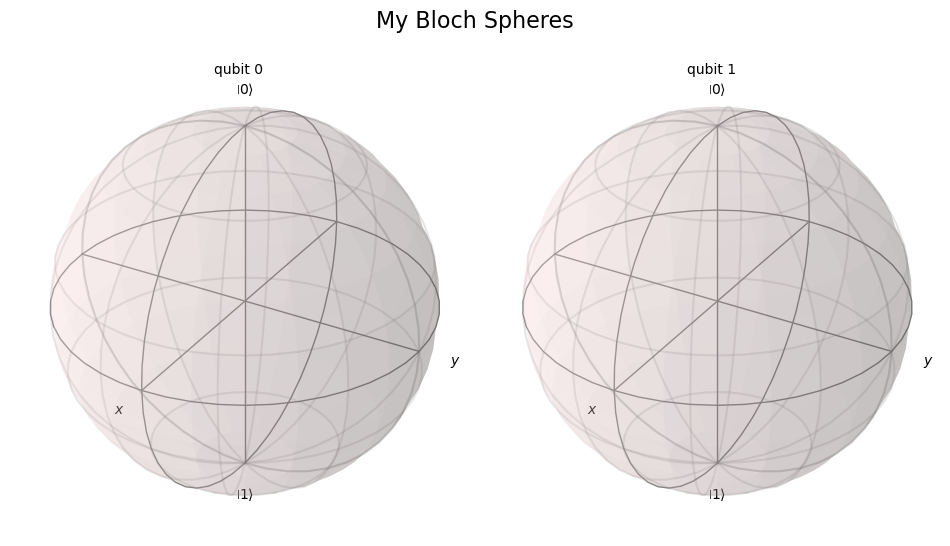

In [15]:
plot_bloch_multivector(sv_ev, title='My Bloch Spheres')

As you can see, this multivector bloch plot does not show any vectors. That is because the state we are trying to plot is **maximally entangled**, i.e. the reduced density matrices of both qubits are maximally mixed states and therefore the expectation value of all X,Y,Z operators is 0!

How can we represent these entangled states then? When the Bloch sphere fails to (as for maximally entangled states), we can ask for a `qsphere`, i.e. a representation of multi-qubit states on a Block-sphere like fashion. Here the size of the balls are proportional to the probability of the state and the color is related to the phase. In fact, **the Qiskit logo is nothing but a QSphere!** (There is a cool exercise on this later in the notebook waiting for you 😉)

> Note: before continuing, we need to install certain python packages to ensure the qsphere can be plotted as expected.

`pip install matplotlib seaborn pylatexenc`

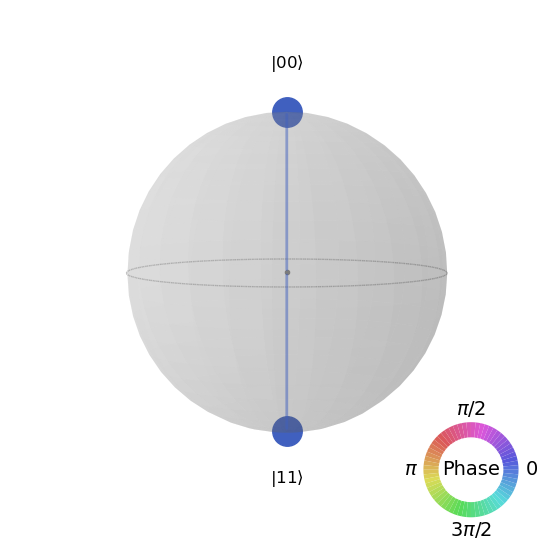

In [16]:
sv_ev.draw('qsphere')

#### Z gate

We have just built the $\Phi^+$ state. We can just use an additional single qubit phase gate to create $\Phi^-$ now. Of course, the phase we want to apply is -1 which means that this phase gate is identical to the Z gate up to a global phase, where Z is:

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

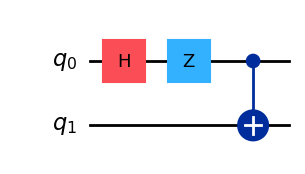

In [17]:
bell_2 = QuantumCircuit(2)
bell_2.h(0)
bell_2.z(0)
bell_2.cx(0,1)
bell_2.draw('mpl')

In [18]:
sv = Statevector.from_int(0, 2**2)
sv_ev = sv.evolve(bell_2)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

You can similarly create $\Psi^+$ and $\Psi^-$, then check with the statevector method. I highly encourage you to do it afterwards even if you find it easy.

For the next demonstration, let’s quickly also build a **GHZ circuit**.

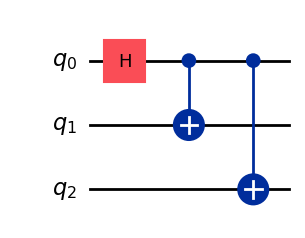

In [19]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)
ghz.draw('mpl')

In [20]:
sv = Statevector.from_label('000')
sv_ghz = sv.evolve(ghz)
sv_ghz.draw('latex')

<IPython.core.display.Latex object>

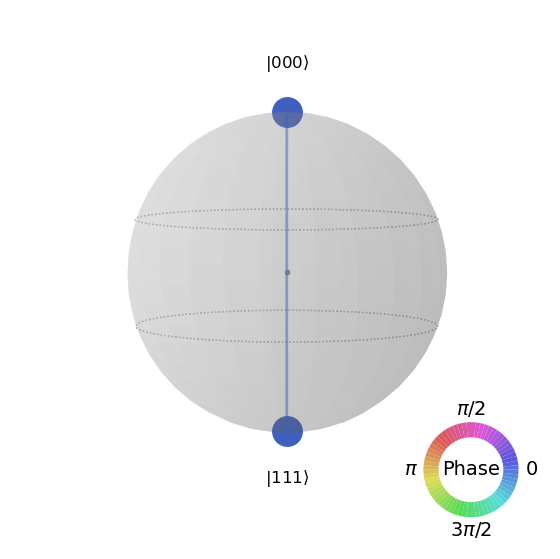

In [21]:
sv_ghz.draw('qsphere')

other way of plotting the state on a qsphere is using command:
```python 
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(sv_ghz)
```

<div class="alert alert-success">

**Exercise** Create Qiskit logo state

$ |Qiskit \rangle = \frac{1}{\sqrt 2}(|0010 \rangle + |1101 \rangle) $

Options:


a)
```python
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.x(1)
```
b)
```python
qc = QuantumCircuit(4)
qc.h(0)
qc.x(0)
qc.cx(0,1,2,3)
```
c) 
```python
qc = QuantumCircuit(4)
qc.h(1)
qc.x(1)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)

```
d) 
```python
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
```

</div>



<div align="center">

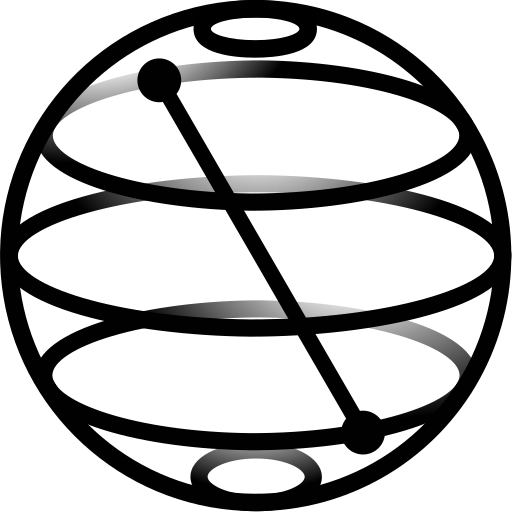

</div>


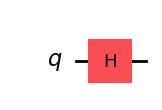

In [22]:
# Create a circuit with the Qiskit logo state

### WRITE YOUR CODE HERE ###




### YOUR CODE FINISHES HERE ###

# Draw the circuit
qc.draw("mpl")


In [ ]:
# Get the statevector of the circuit
sv = Statevector(qc)

# Plot the state using qsphere visualization
plot_state_qsphere(sv)

---
**Side note on Statevector class:** 
 
We have seen for now these commands to represent and evolve states according to a quantum circuit qc:
```python
sv = Statevector.fromlabel(); sv = Statevector.from_int()
sv.evolve(qc)
```

However, the `Statevector` class can also be instantiated by passing a quantum circuit, which effectively "simulates" the evolution assuming all the qubits are in the zero state initially.


In [23]:
state = Statevector(ghz)
print(state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


---
### Visualization tools for states

**RECAP:**
```python
sv.draw(); sv.draw('latex')
plot_bloch_multivector(sv) 
sv.draw('qsphere'); plot_state_qsphere(sv)
```

We can also visualize GHZ state using what’s called a **hinton plot**. This is useful for Density Matrices of mixed states. Hinton diagram represents values of a matrix using squares, the sizes indicate magnitudes and the color, their sign. 

- White -> positive
- Black -> negative

In this case, $\rho = \ket{GHZ}\bra{GHZ}$

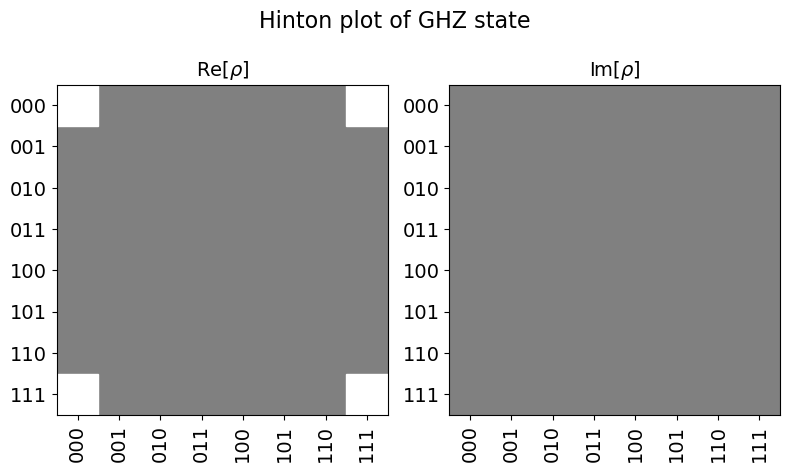

In [24]:
state.draw('hinton', title='Hinton plot of GHZ state')

We can also make a hinton plot with these commands:
```python 
from qiskit.visualization import plot_state_hinton
plot_state_hinton(state, title='...')
```

We can also visualize the density matrix by plotting the bar graphs of the real and imaginary part of the density matrix $\rho$.

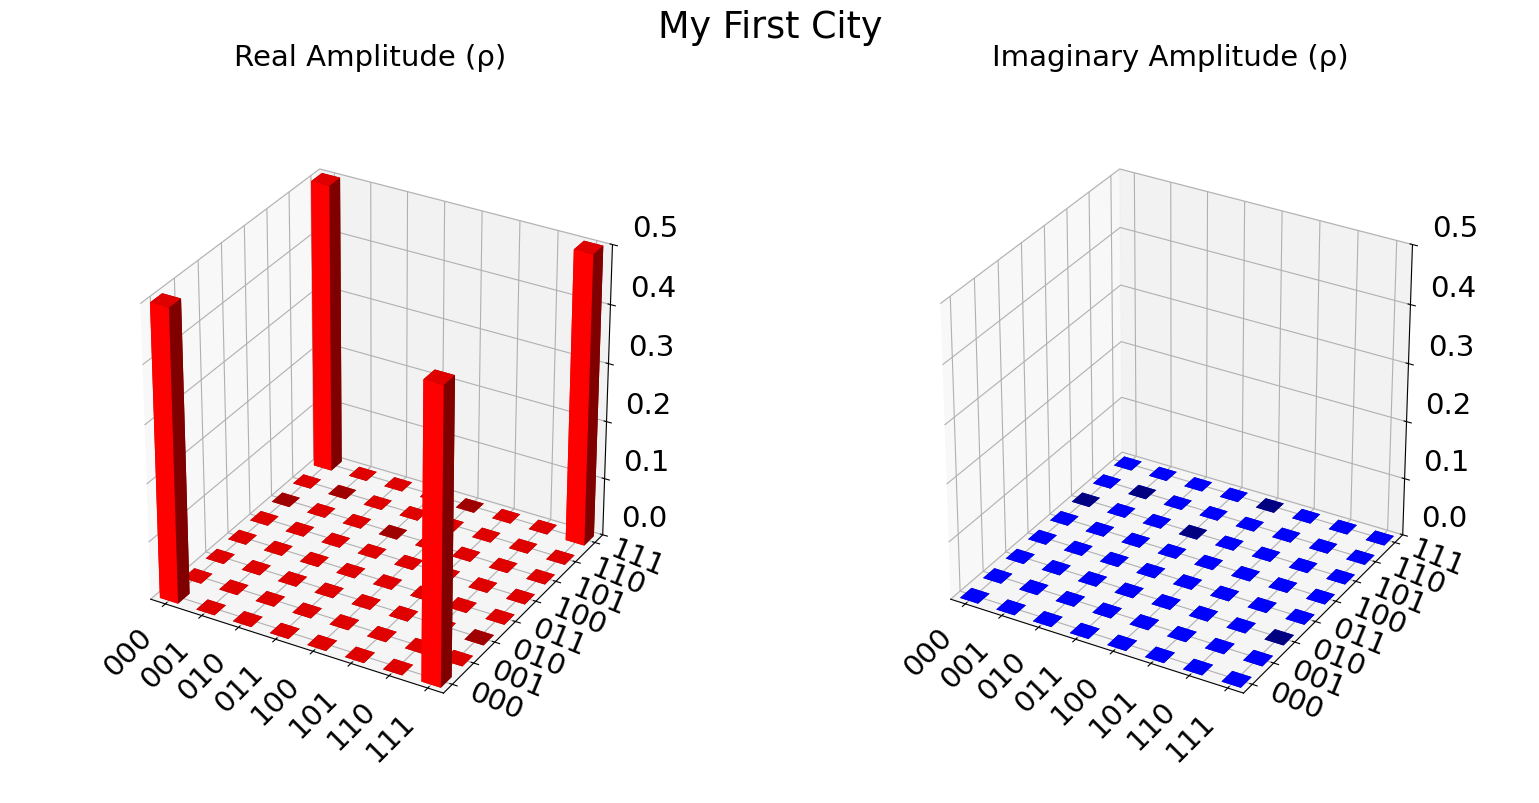

In [25]:
from qiskit.visualization import plot_state_city

plot_state_city(state, title='My First City', color=['red', 'blue'])

Another useful representation is the Pauli-vector of the evolved state. The following function plots the coefficients $Tr(\rho \sigma)$ for each $\sigma$ of the Pauli operators of the n-Pauli group.

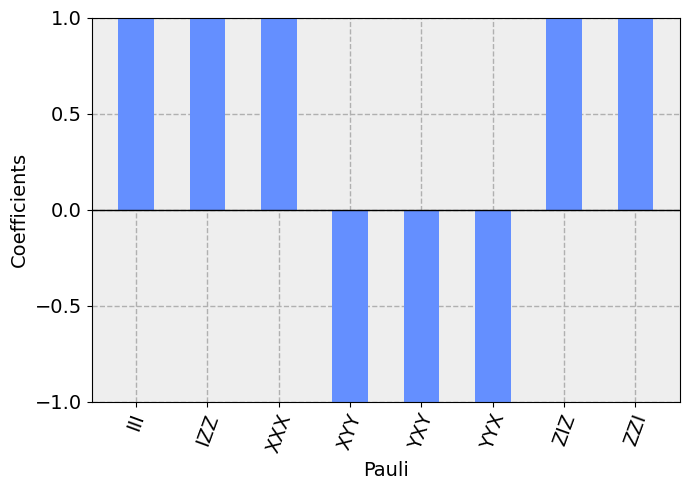

In [26]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(state)

#### Further on `plot_bloch_multivector`
As we have seen, `plot_bloch_multivector` is a visualization function that we can use to represent individual qubits is the Bloch Sphere representation.

In [116]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)

sv_evo = Statevector(circuit)
circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

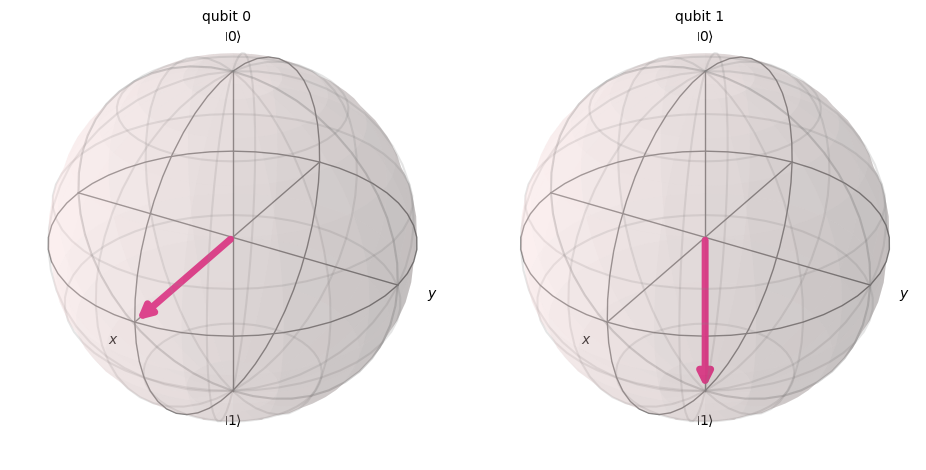

In [117]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(sv_evo)

We have also seen that this visualization works well for a product state, showing the pure states of distinct qubits on different Bloch spheres, but what if there is entanglement? Then in that case we are seeing the expectation values of the X, Y, Z operators of the reduced matrices of each single qubit.

But what if the state obtained by the evolution of the circuit is a mixed state? For this, we will look at the DensityMatrix object from the quantum_info module.

In [29]:
from qiskit.quantum_info import DensityMatrix

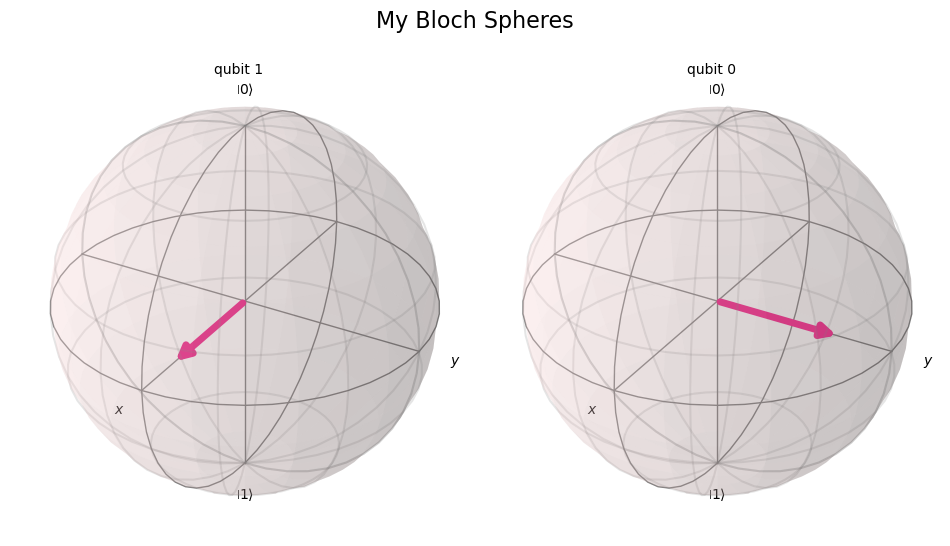

In [30]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.t(1)
qc.s(0)
qc.cx(0,1)

matrix = DensityMatrix(qc)
plot_bloch_multivector(matrix, title='My Bloch Spheres', reverse_bits = True)

Now this was a Bloch sphere representation for things coming out of a circuit. But there is also another function, not the multivector, but simply a `plot_bloch_vector` and this function takes as input not a circuit, but coordinates directly. 

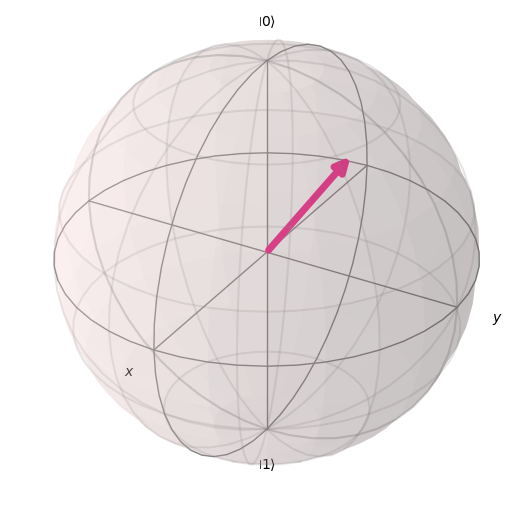

In [31]:
from qiskit.visualization import plot_bloch_vector


plot_bloch_vector([0.1, 0.5, 0.7])

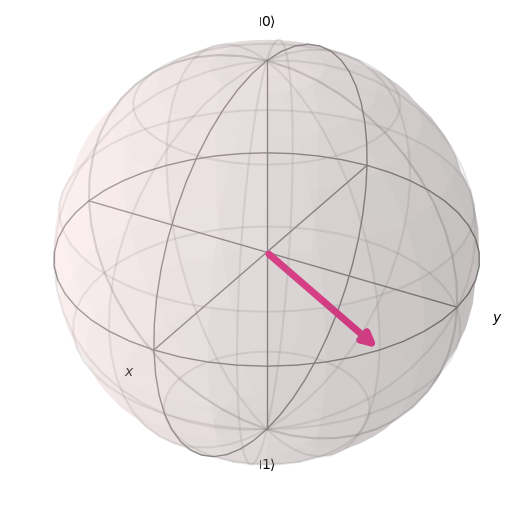

In [32]:
plot_bloch_vector([1, np.pi/2, np.pi/3], coord_type='spherical')

### Unitaries

Until now, we've been dealing with the states, rather than the circuits. But what if we actually wanted to learn more about the circuit itself, or we have a Unitary that we don't know the circuit representation of. Similar to the statevector, we can employ the `quantum_info` module to this end.

In [33]:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.cx(0,2)
qc.x([1,3])
qc.ry(np.pi/7, 2)
qc.cz([0,1],[2,3])
qc.draw()

┌───┐                      
q_0: ┤ H ├──■─────────────────■─
     ├───┤  │     ┌───┐       │ 
q_1: ┤ H ├──┼─────┤ X ├────■──┼─
     ├───┤┌─┴─┐┌──┴───┴──┐ │  │ 
q_2: ┤ H ├┤ X ├┤ Ry(π/7) ├─┼──■─
     ├───┤├───┤└─────────┘ │    
q_3: ┤ H ├┤ X ├────────────■────
     └───┘└───┘

In [34]:
from qiskit.quantum_info import Operator

In [35]:
U = Operator(qc)
U.data

array([[ 0.18810174+0.j,  0.18810174+0.j, -0.18810174+0.j,
        -0.18810174+0.j,  0.29936221+0.j,  0.29936221+0.j,
        -0.29936221+0.j, -0.29936221+0.j, -0.18810174+0.j,
        -0.18810174+0.j,  0.18810174+0.j,  0.18810174+0.j,
        -0.29936221+0.j, -0.29936221+0.j,  0.29936221+0.j,
         0.29936221+0.j],
       [ 0.18810174+0.j, -0.18810174+0.j, -0.18810174+0.j,
         0.18810174+0.j, -0.29936221+0.j,  0.29936221+0.j,
         0.29936221+0.j, -0.29936221+0.j, -0.18810174+0.j,
         0.18810174+0.j,  0.18810174+0.j, -0.18810174+0.j,
         0.29936221+0.j, -0.29936221+0.j, -0.29936221+0.j,
         0.29936221+0.j],
       [ 0.18810174+0.j,  0.18810174+0.j,  0.18810174+0.j,
         0.18810174+0.j,  0.29936221+0.j,  0.29936221+0.j,
         0.29936221+0.j,  0.29936221+0.j, -0.18810174+0.j,
        -0.18810174+0.j, -0.18810174+0.j, -0.18810174+0.j,
        -0.29936221+0.j, -0.29936221+0.j, -0.29936221+0.j,
        -0.29936221+0.j],
       [ 0.18810174+0.j, -0.18810174+

In [36]:
U.data.shape

(16, 16)

Caution here, as this is the Unitary simulator, it only works with ideal gates and no noise.

## 2. Executing Circuits on a Quantum Backend

So far, we have only simulated *ideal* quantum circuits — meaning we assumed perfect gates, no noise, and made use of exact mathematics acting in the background of our code to obtain and visualize the exact evolved state, which in reality would correspond to doing infinitely many measurement repetitions (shots) and then applying state tomography techniques to build the state.

However, real quantum devices are subject to **noise**, **decoherence**, and **readout errors**.

In reality, we execute our circuits on what’s called a **quantum backend**. 

A *backend* can be:
- an **actual physical quantum device**, or  
- a **simulator** that mimics the behavior of a device (with or without noise).

Now, to visualize the final state of our simulation, we have to effectively run and measure our circuit many times.


<div class="alert alert-info">

In this module, we will **not** execute circuits on real quantum hardware, but rather use **fake backends** that simulate real noise models from IBM Quantum systems.

If you are interested in doing this: check out the [set up to use IBM Quantum™ Platform](https://docs.quantum.ibm.com/guides/setup-channel#set-up-to-use-ibm-quantum-platform), to run a quantum circuit on the actual quantum computers!

</div>

### Step 0: Create quantum circuit and the observables to measure

In [37]:
# Code cell: imports and example circuit
from qiskit import QuantumCircuit


# Example small circuit: prepare a 2-qubit Bell-like state and measure
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
# we will use this circuit for both estimator (expectation) and sampler (counts)
qc.draw('text')


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

We now import a fake backend called `FakeBrisbane` that contains a snapshot of the real (Brisbane) device configuration (coupling map, basis gates, noise parameters, T1/T2, readout errors, etc.). It is not a simulator by itself. In particular, FakeBrisbane() provides a programmatic description of the hardware (topology, gates, physical error rates), useful for transpiling (Step 1) and for generating a noise model for simulation.

FakeBrisbane is just one of many fake backends mimicking the real backends, check all of them out here in the [Qiskit Fake Providers section](https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/fake-provider).

To actually carry out a realistic noisy simulation, we also import `AerSimulator` from `qiskit-aer`, which represents a noisy local simulator that you can run locally — it will produce outcomes including noise effects similar to the real hardware snapshot.

In [105]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit_aer import AerSimulator

# Create the fake backend (device snapshot)
fake_backend = FakeBrisbane()
# Build an AerSimulator that inherits the fake backend's noise model
sim = AerSimulator.from_backend(fake_backend, seed_simulator=42)

`AerSimulator.from_backend(fake_backend)` takes the fake backend's properties and constructs a simulator that behaves statistically like the real device (it includes gate errors, thermal relaxation, readout errors, coupling map constraints, etc.).

`seed_simulator=42` sets the internal RNG seed for the simulator so that repeated runs (with the same circuit and shots) produce identical outcomes — useful for reproducibility and debugging.


### Step 1: Transpilation — Optimize the circuits and gates

When executing circuits on a device, it is important to optimize the set of instructions that the circuit contains and minimize the overall depth (roughly the number of instructions) of the circuit. This ensures that we obtain the best results possible by reducing the effects of error and noise. Additionally, the circuit's instructions must conform to a backend device's [Instruction Set Architecture (ISA)](https://docs.quantum.ibm.com/guides/transpile#instruction-set-architecture) and must consider the device's basis gates and qubit connectivity.

This job is done by the `pass manager`. In particular, it maps logical qubits onto physical qubits (layout), inserts SWAPs if needed, decomposes gates into the device basis set and applies optimizations (depending on optimization_level).

This pipeline returns a circuit ready for execution on that backend (an ISA circuit).

`isa_circuit`: The same logical program, but rewritten so its gates and qubit indices match the backend's expected instruction set and layout.

**More about this step in the next notebook!**

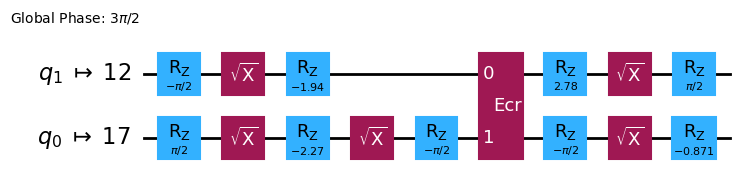

In [39]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Generate a preset pass manager tailored for the fake backend
pm = generate_preset_pass_manager(backend=fake_backend, optimization_level=2)

# Run the pass manager (transpilation pipeline) to obtain the ISA circuit
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

### 2. Execute using a quantum primitive function

When creating quantum circuits, we must also consider what type of data we want returned after execution. Qiskit provides two ways to return data: we can obtain a probability distribution for a set of qubits we choose to measure, or we can obtain the expectation value of an observable. We can measure our circuit in one of these two ways with [Qiskit primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives). For both cases, it is important to note once again that **we have to collect a sample of the outputs by running the circuit many times**.

1. `Estimator` class: primitive used to estimate the value of chosen observables.
2. `Sampler` class: primitive used to get data from the quantum computer. E.g. to build the probability distribution for a set of qubits.

These objects possess a `run()` method that executes the selection of circuits, observables, and parameters (if applicable), using a [primitive unified block (PUB)](https://docs.quantum.ibm.com/guides/primitives#sampler).

For **PUB** we mean the unit of work you send to a Qiskit primitive (Estimator / Sampler) in qiskit-ibm-runtime. Concretely it's a grouping of:
- a circuit (or list of circuits), and optionally
- observables and/or parameters

The primitive executes each pub and returns results per pub. You pass one or more pubs to `.run(...)` as a list — each element is a pub.



#### Estimator:

We will start with an example using the `Estimator` primitive. This example measures expectation values by using the `qiskit.quantum_info` submodule, which is specified by using operators (mathematical objects used to represent an action or process that changes a quantum state). The following code cell creates six two-qubit Pauli operators: `IZ`, `IX`, `ZI`, `XI`, `ZZ`, and `XX`.


In [40]:
from qiskit.quantum_info import SparsePauliOp

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"] # <-- add more Pauli operators
observables = [SparsePauliOp(label) for label in observables_labels]
print(observables)

[SparsePauliOp(['IZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['IX'],
              coeffs=[1.+0.j]), SparsePauliOp(['ZI'],
              coeffs=[1.+0.j]), SparsePauliOp(['XI'],
              coeffs=[1.+0.j]), SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j])]


Note that, if we compute expectation values of some operators (observables), we must map those operators to the same physical qubits used in the compiled circuit.

**Why?**
After transpilation the logical-to-physical mapping (layout) might differ from the circuit's original logical qubit order.
`apply_layout` ensures the operators are defined on the same physical qubits the circuit will use, so expectation values correspond to the intended observables.


In [41]:
# Map the observables to the circuit layout
mapped_observables = [observable.apply_layout(isa_circuit.layout) for observable in observables]

Now, we finally run a single PUB with 5000 shots making use of the `Estimator` primitive

In [42]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Construct the Estimator instance.
estimator = Estimator(mode=fake_backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000


# Here we are running a single PUB: one circuit with a list of six observables
job = estimator.run([(isa_circuit, mapped_observables)])


# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: 5782a8d6-84f6-41c0-9240-11991ae6a1eb


/Users/giovanniconcheri/miniconda3/envs/QiskitHackathon/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")


After a job is submitted, you can wait until either the job is completed within your current python instance, or use the `job_id` to retrieve the data at a later time.  (See the [section on retrieving jobs](https://docs.quantum.ibm.com/guides/monitor-job#retrieve-job-results-at-a-later-time) for details.)

After the job completes, examine its output through the job's `result()` attribute.



In [43]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

#### Sampler:

Now we can also execute the circuit using the `Sampler` primitive. To do so, we first add measurements at the end of the circuit to all of our qubits by using the `measure_all` method.

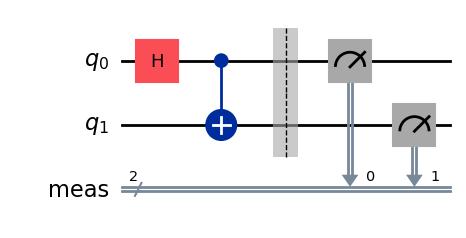

In [44]:
# We include the measurements in the circuit
qc.measure_all()
qc.draw('mpl')

Now, as you can see, the measure_all method has added measurements to our circuit which had no classical registers or measurements prior. It is really important to know that this method creates new classical registers while adding measurements. So it's best employed for circuits that don't have pre-defined classical registers.

Now, we import and call the `Sampler` primitive

In [45]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=fake_backend)

And now we execute the circuit and get the results

In [46]:
job_sampler = sampler.run(pm.run([qc]))

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job_sampler.job_id()}")

# Get the results
results_sampler = job_sampler.result()

>>> Job ID: eaa2cc5c-83d0-44e7-961e-85a518b90e74


### Step 3: Analyze the results

The analyze step is typically where you might postprocess your results using, for example, measurement error mitigation or zero noise extrapolation (ZNE). You might feed these results into another workflow for further analysis or prepare a plot of the key values and data. In general, this step is specific to your problem.  For this example, plot each of the expectation values that were measured for our circuit.

The expectation values and standard deviations for the observables you specified to Estimator are accessed through the job result's `PubResult.data.evs` and `PubResult.data.stds` attributes. To obtain the results from Sampler, use the `PubResult.data.meas.get_counts()` function, which will return a `dict` of measurements in the form of bitstrings as keys and counts as their corresponding values. For more information, see [Get started with Sampler.](https://docs.quantum.ibm.com/guides/get-started-with-primitives#get-started-with-sampler)


#### Estimator

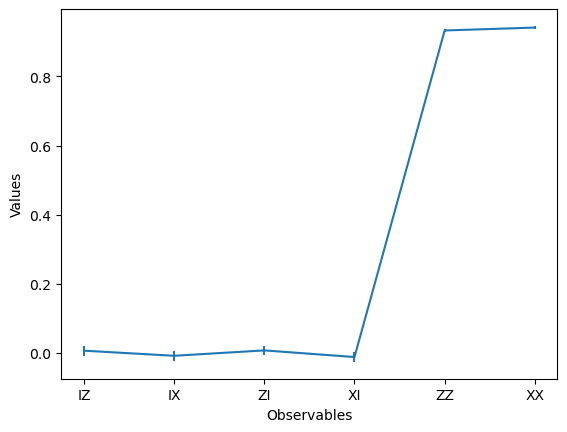

In [47]:
# Plot the result
from matplotlib import pyplot as plt
values = pub_result.data.evs # expectation values of all observables
errors = pub_result.data.stds # standard deviations of all expectation values
# plotting graph
plt.errorbar(observables_labels, values, yerr=errors, fmt="-")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

Notice that for qubits 0 and 1, the independent expectation values of both X and Z are 0, while the correlations (`XX` and `ZZ`) are 1. This is a hallmark of quantum entanglement.



#### Sampler:

Now we plot the results for the Sampler

{'00': 499, '11': 503, '10': 11, '01': 11}
  Outcomes : {'00': 499, '11': 503, '10': 11, '01': 11}


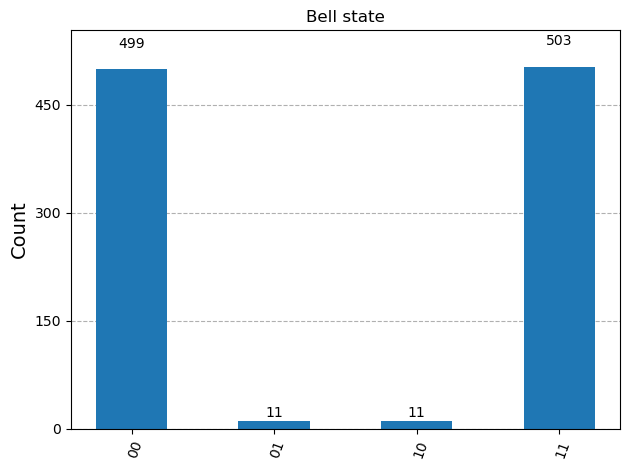

In [48]:
from qiskit.visualization import plot_histogram

counts_list = results_sampler[0].data.meas.get_counts()
print(counts_list)
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="Bell state"))

As one expects, there is a small deviation from the ideal Bell state, since we are using a noisy simulator that reproduced the noise of the backend `ibm_brisbane`

## 3. Scale to large numbers of qubits (Optional part)

In quantum computing, utility-scale work is crucial for making progress in the field. Such work requires computations to be done on a much larger scale; working with circuits that might use over 100 qubits and over 1000 gates. This example takes a small step in that direction scaling the GHZ problem to $n=10$ qubits.  It uses the Qiskit patterns workflow and ends by measuring the expectation value $\langle Z_0 Z_i \rangle $ for each qubit.

### Step 0: Map the problem

Write a function that returns a `QuantumCircuit` that prepares an $n$-qubit GHZ state (essentially an extended Bell state), then use that function to prepare a 10-qubit GHZ state and collect the observables to be measured.

<div class="alert alert-success">

**Exercise** Create a n-qubit GHZ state circuit


Options:

a)
```python
for i in range(n-1):
    qc.cx(i, i+1)
qc.h(0)
```

b)
```python
qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)
```

c) 
```python
qc.h(0)
for i in range(n):
    qc.cx(i, i+1)
```
d) 
```python
for i in range(n):
    qc.h(i)
    qc.cx(i, i+1)

```


</div>

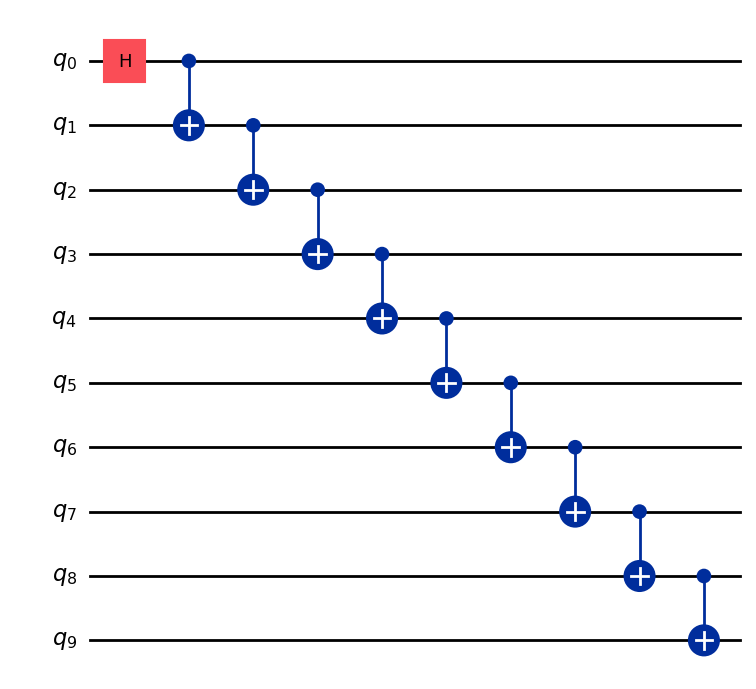

In [ ]:
def get_qc_for_n_qubit_GHZ_state(n: int) -> QuantumCircuit:

    qc = QuantumCircuit(n) 
    ### WRITE YOUR CODE HERE ###

    ### YOUR CODE FINISHES HERE ###
    return qc


# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
n = 10
qc_n_GHZ = get_qc_for_n_qubit_GHZ_state(n)
qc_n_GHZ.draw("mpl")

Next, map to the operators of interest. This example uses the `ZZ` operators between qubits to examine the behavior as they get farther apart.  Increasingly inaccurate (corrupted) expectation values between distant qubits would reveal the level of noise present.

<div class="alert alert-success">

**Exercise** Create a list of `ZZ` operators with increasing distance.

Starting with `ZZII...II`, `ZIZI...II`, `ZIIZ...II`, increasing the distance between the two `Z` operators to the farthest position `ZIII...IZ`.

Options:

a)
```python
operator_strings = [
    "Z" + "I" * i + "Z" + "I" * (n - 2) for i in range(n - 1)
]
```

b)
```python
operator_strings = [
    "Z" + i * "I" + "Z" + i * "I" for i in range(n - 1)
]
```

c) 
```python

operator_strings = [
    "Z" + "Z" + "I" * (n - i - 1) for i in range(n - 1)
]
```
d) 
```python
operator_strings = [
    "Z" + i * "I" + "Z" + "I" * (n - i - 2) for i in range(n - 1)
]

```

</div>

In [ ]:
### WRITE YOUR CODE HERE ###
# ZZII...II, ZIZI...II, ... , ZIII...IZ

### YOUR CODE FINISHES HERE ###

operators = [SparsePauliOp(operator) for operator in operator_strings]

### Step 2. Optimize the problem for execution on quantum backend

Transform the circuit and observables to match the backend's ISA.



In [123]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=fake_backend, optimization_level=2)
isa_circuit = pm.run(qc_n_GHZ) 
isa_operators_list = [operator.apply_layout(isa_circuit.layout) for operator in operators] 

### Step 3. Execute on backend

Submit the job and if you execute it on hardware enable error suppression by using a technique to reduce errors called [dynamical decoupling.](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/options-dynamical-decoupling-options) The resilience level specifies how much resilience to build against errors. Higher levels generate more accurate results, at the expense of longer processing times.  For further explanation of the options set in the following code, see [Configure error mitigation for Qiskit Runtime.](https://docs.quantum.ibm.com/guides/configure-error-mitigation)



In [124]:
# Submit the circuit to Estimator
job = estimator.run([(isa_circuit, isa_operators_list)])
job_id = job.job_id()

/Users/giovanniconcheri/miniconda3/envs/QiskitHackathon/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")


### Step 4. Post-process results

To better understand the behavior of entangled quantum states on real hardware, we analyze the pairwise correlations between qubits in the Z basis. Specifically, we look at the expectation values ⟨Z₀Zᵢ⟩, which measure how strongly qubit 0 is correlated with each other qubit i. In particular we are going to plot: 
$$
\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle 
$$

<div class="alert alert-success">

**Exercise** Which values of $\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $ do you expect to see in the plot?

Options:

a) Decreasing as we increase $i$

b) Constant in 1

c) Small deviations around 1

d) Alternating 1 and 0 for odd and even values of $i$

</div>

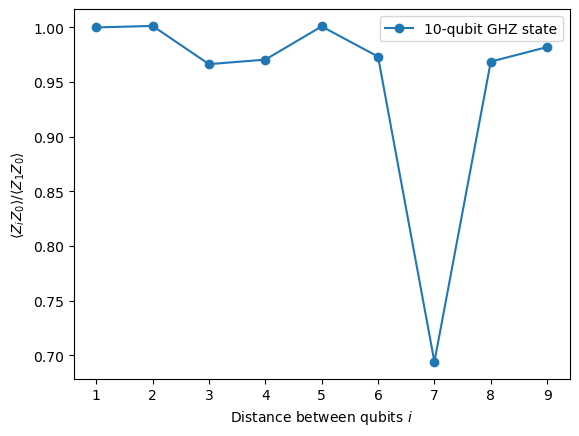

In [125]:
# data
data = list(range(1, len(operators) + 1))  # Distance between the Z operators
result = job.result()[0]
values = result.data.evs  # Expectation value at each Z operator.
values = [
    v / values[0] for v in values
]  # Normalize the expectation values to evaluate how they decay with distance.

# plotting graph
plt.plot(data, values, marker="o", label=f"{n}-qubit GHZ state")
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r"$\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $")
plt.legend()
plt.show()

In this plot we notice that $\langle Z_0 Z_i \rangle$ fluctuates around the value 1, even though in an ideal simulation all $\langle Z_0 Z_i \rangle$ should be 1.



<div class="alert alert-success">

**Exercise** A more efficient implementation of GHZ state

As you can see, the results of 10 qubit experiments are good but still have some errors. One way to improve the results is to implement GHZ state more efficiently. 

You are probably implementing GHZ state with a staircase-like CNOT gates sequence. You can implement GHZ state more efficiently, reducing the 2-qubit depth from `n` to `n/2` or less.

Options:

a)
```python
for m in range(s, 0, -1):
    qc.cx(m, m - 1)
    if not (n % 2 == 0 and m == s): 
        qc.cx(n - m - 1, n - m)
```

b)
```python

for m in range(s):
    qc.cx(n - m - 1, n - m)
    if not (n % 2 == 0 and m == s):
        qc.cx(m, m - 1)

```

c) 
```python
for m in range(s, 0, -1):
    qc.cx(m, m - 1)
    if (n % 2 == 0 and m == s): 
        qc.cx(n - m - 1, n - m)
```
d) 
```python

for m in range(s, 0, -1):
    if n % 2 == 0 and m == s:
        qc.cx(n - m - 1, n - m)
    qc.cx(m, m - 1)

```

</div>

<div class="alert alert-info">

One important metric to benchmark how accurate the results will be, or how little noise will have for a circuit is 2-qubit gate depth. This is because the error rates for 2-qubit gates (~10 times higher than single qubit gates) dominate the errors of the whole circuit. Use the following code to get 2-qubit gate depth of a circuit.

```python
qc.depth(lambda x: x.operation.num_qubits == 2)
```

</div>

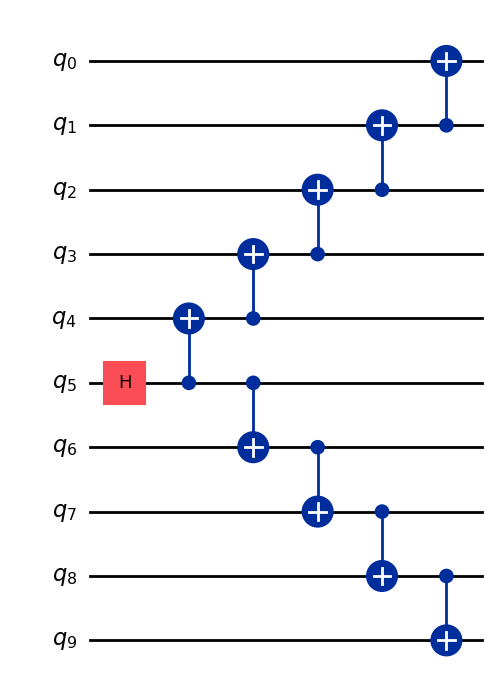

In [ ]:
def better_ghz(n):
    "fan out"
    s = int(n / 2)
    qc = QuantumCircuit(n)
    qc.h(s)
    ### WRITE YOUR CODE HERE ###

    ### YOUR CODE FINISHES HERE ###
    return qc


better_ghz(n).draw("mpl")

In [ ]:
# Check 2-qubit gate depth before transpilation
qc_better_ghz = better_ghz(n)
qc_better_ghz.depth(lambda x: x.operation.num_qubits == 2)

5

An interesting thing to note here is that we were able to reduce the quantum depth of the circuit we want to execute just by being smart and thinking of a different way to program it. However, there will be situations and algorithms where we can't rely on these clever tricks. This is where the transpiler comes in handy, it helps us optimize all these aspects efficiently, so we don't have to worry too much about them.

## 4. Other interesting Qiskit functionalities (Optional)

### Initialization of a state

We have seen how to execute the circuit on a quantum backend and how to scale to large circuits. Now let's look at something a little different. Let's say, we have a quantum protocol in which we'd like to see how a specific state evolves. Can we initialize this specific state with a circuit? The answer is, yes. For simulation purposes.

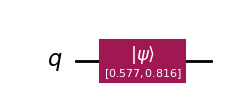

In [127]:
a = 1/np.sqrt(3)
b = np.sqrt(1-a**2)

desired_state = [a, b]

q_reg = QuantumRegister(1, 'q')
qc = QuantumCircuit(q_reg)
qc.initialize(desired_state, 0)
qc.draw('mpl')

We can use the `decompose` method to break down the circuit into its elementary parts (also used later in a more illustrative cases)

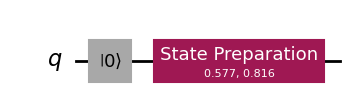

In [128]:
decomp = qc.decompose()
decomp.draw('mpl')

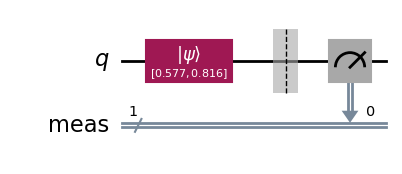

In [129]:
qc.measure_all()
qc.draw('mpl')

Now let's check if the results given by the simulation on the backend correspond to the state we are trying to prepare!

In [130]:
alpha_squared = a**2
beta_squared = b**2
print(alpha_squared, beta_squared)

0.3333333333333334 0.6666666666666665


{'1': 663, '0': 361}


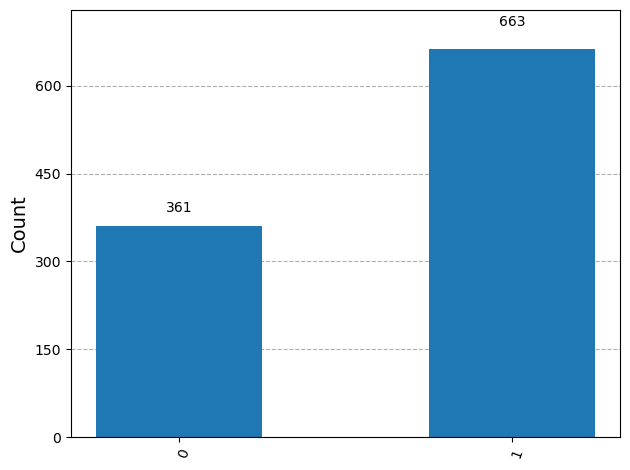

In [131]:
isa_qc = pm.run([qc])

sampler = Sampler(mode=fake_backend)

job = sampler.run(isa_qc)
results = job.result()
counts = results[0].data.meas.get_counts()
print(counts)
plot_histogram(counts)

How about the statevector that we acquire from this initialization, and what about the operator form?

Really important to note here that the Unitary simulation of this circuit would not work because the qubit reset operation is not supported as of Qiskit 2.x

In [132]:
from qiskit.quantum_info import Statevector

a = 1/np.sqrt(3)
b = np.sqrt(1-a**2)

desired_state = [a, b]

q_reg = QuantumRegister(1, 'q')
qc = QuantumCircuit(q_reg)
qc.initialize(desired_state, 0)
qc.draw('mpl')

qc_sv = Statevector(qc)
qc_sv

Statevector([0.57735027+0.j, 0.81649658+0.j],
            dims=(2,))


In [134]:
from qiskit.quantum_info import Operator
from qiskit.exceptions import QiskitError

try:
    Operator(qc)
except QiskitError:
    print("Error raised as expected")

Error raised as expected


### State and Gate/Process fidelity

State and Gate/Process fidelity are two very important concepts in Quantum Information, let's now see how we can play with these within Qiskit.

For the state process, let's compare the defined desired state (which is a numpy array defined by us) and the state obtained from the circuit evolution. We know if everything worked perfectly during state preparation, we should get Fidelity = 1.

In [135]:
from qiskit.quantum_info import state_fidelity
state_fidelity(desired_state, qc_sv)

0.9999999999999998

Now that we've checked state fidelity, how about gate/process fidelity?
To do this, let's also see a new way of calling a Gate definition directly and wrap it up as a Unitary operator object like we've done in section 1. We'll then also create another operator just differing from the first by an overall phase, and thus if we compare the fidelities, we should find they are the same. Let's see how this works.

In [75]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, process_fidelity, average_gate_fidelity

op_a = Operator(XGate())
op_b = np.exp(1j/2)*op_a

a = process_fidelity(op_a, op_b)
a

1.0

In [76]:
b = average_gate_fidelity(op_a, op_b)
a == b

True

### How to build generalized gates

Now we'll do something quite distinct to what we've been doing so far.
So far we've been using pre-defined gates from a pretty well known gate set to construct circuits.
And this makes sense, because universality implies that whichever gate we use really does not matter theoretically.
Of course that argument doesn't take into account how efficient a circuit can be, or for the programmer, how easy it will be to write a quantum program.

For the latter point, we'll be looking at how we can create custom gates via different approaches.

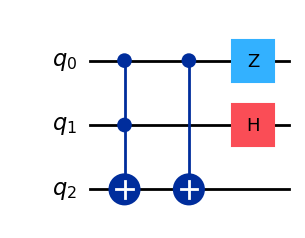

In [77]:
qc = QuantumCircuit(3)
qc.mcx([0,1],2)
qc.cx(0,2)
qc.h(1)
qc.z(0)
qc.draw('mpl')

Let us introduce the new `append` method to add customized gates to the circuit!

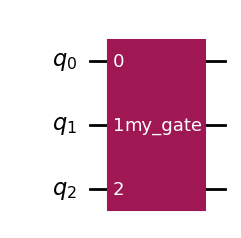

In [78]:
qc_gate = qc.to_gate()
qc_gate.name ='my_gate'

circ = QuantumCircuit(3)
circ.append(qc_gate, [0,1,2])
circ.draw('mpl')

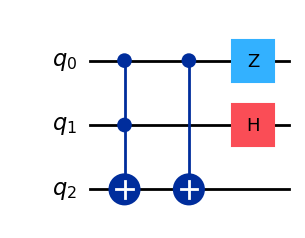

In [79]:
circ_decomp = circ.decompose()
circ_decomp.draw('mpl')

What if we want to create a controlled, or better yet a multi-controlled version of a generic gate?

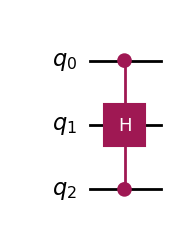

In [80]:
from qiskit.circuit.library import HGate
ch = HGate().control(2)

qc = QuantumCircuit(3)
qc.append(ch, [0,2,1])
qc.draw('mpl')

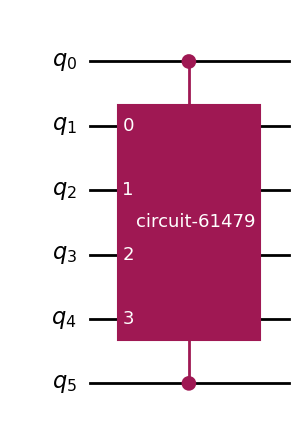

In [81]:
circ = QuantumCircuit(4)
circ.h(range(2))
circ.cx(0,1)
circ.cx(0,3)
circ.crz(np.pi/2, 0, 2)

my_gate = circ.to_gate().control(2)
qc = QuantumCircuit(6)
qc.append(my_gate, [0, 5, 1, 2, 3, 4])
qc.draw('mpl')

Let's decompose this complicated gate definition:

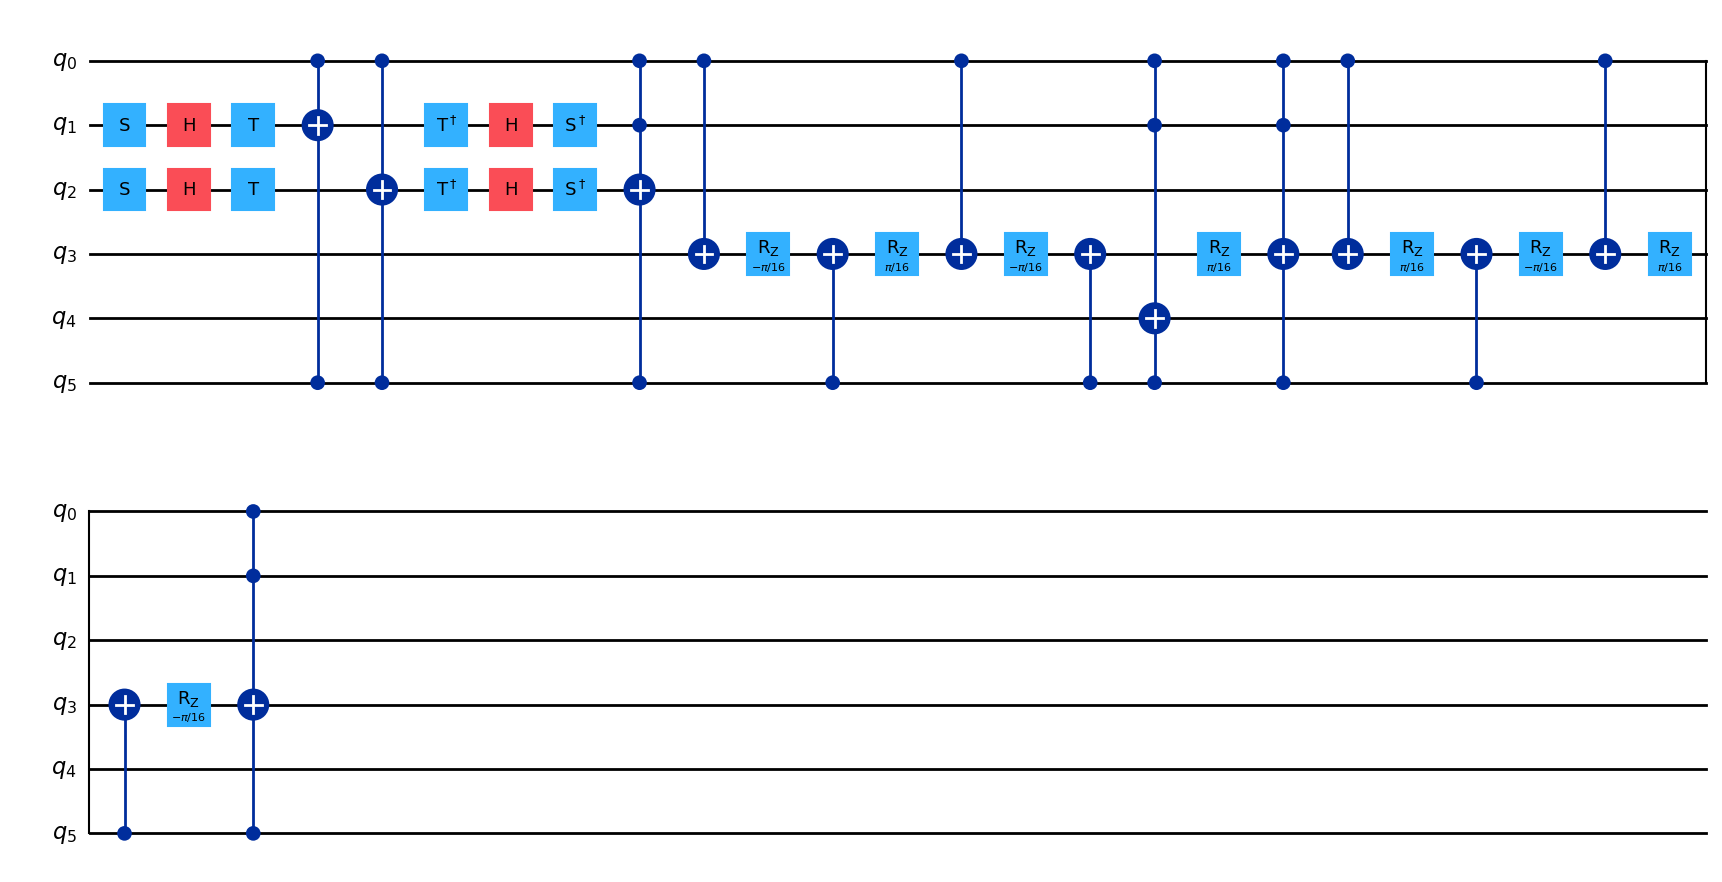

In [82]:
circ = qc.decompose()
circ.draw('mpl')

Crazy!

That's it from my side! I hope you enjoyed learning about Qiskit with me! 🤩 by Gio C.